# Bernstein - Vazirani Algorithm

Showing how quantum computer can out-performe classical computer

The task is to guess a binary number:<br>
for the number = "10101010100" the classical computer can guess the number with o(n) as n = length of the bits,
while quantum computer can do the task with o(1) (one run)

In [1]:
from qiskit import *
%matplotlib inline
from qiskit.tools.visualization import plot_histogram

In [2]:
secretNumber = '10101010100'

In [3]:
# Crearting the circuit
circuit = QuantumCircuit(len(secretNumber)+1,len(secretNumber))

In [4]:
# Build the circuit

# Put H gate on all qubits
circuit.h(range(len(secretNumber)))

# Put X gate and H gate on last qubit
circuit.x(len(secretNumber))
circuit.h(len(secretNumber))

circuit.barrier()

# Define a CX gate from last qubit for each qubit in a '1' position
for index, one in enumerate(reversed(secretNumber)):
    print(f"index{index} is {one}")
    if one == "1":
        circuit.cx(index,len(secretNumber))

circuit.barrier()

circuit.h(range(len(secretNumber)))

circuit.barrier()

circuit.measure(range(len(secretNumber)),range(len(secretNumber)))

index0 is 0
index1 is 0
index2 is 1
index3 is 0
index4 is 1
index5 is 0
index6 is 1
index7 is 0
index8 is 1
index9 is 0
index10 is 1


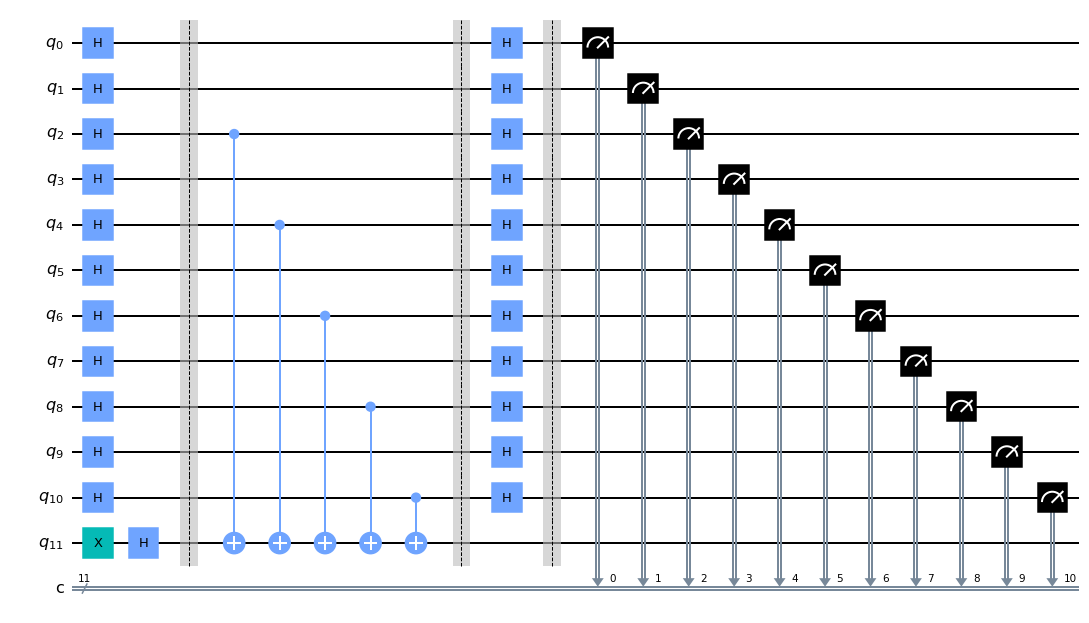

In [6]:
circuit.draw(output='mpl')

In [7]:
# Run the circuit with only one shot
simulator = Aer.get_backend('qasm_simulator')
result = execute(circuit, backend=simulator, shots=1).result()
counts = result.get_counts()
print(counts)

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


{'10101010100': 1}


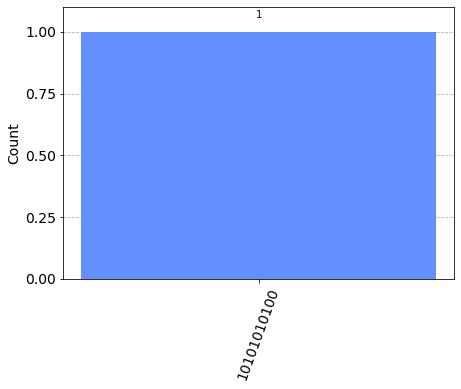

In [8]:
# Plotting the answer
plot_histogram([counts])